# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Harshil Patel

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# Import the necessary libraries from Yellowbrick and load_concrete dataset
import yellowbrick
from yellowbrick.datasets import load_concrete

# Load the concrete dataset into X (features) and y (target)
X, y = load_concrete()

# Print the shape of the feature matrix X
print("Shape of X (features):", X.shape)

# Print the shape of the target vector y
print("Shape of y (target):", y.shape)


Shape of X (features): (1030, 8)
Shape of y (target): (1030,)


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [4]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Import necessary libraries and modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a dictionary of regression models to be evaluated
models = {
    "DT": DecisionTreeRegressor(max_depth=5),
    "RF": RandomForestRegressor(n_estimators=100),
    "GB": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
}

# Create an empty DataFrame to store results with model names as columns
results = pd.DataFrame(columns=["Training MSE", "Validation MSE"], index=models.keys())

# Loop through each model and evaluate its performance
for model_name, model in models.items():
    # Evaluate the model's performance using cross-validation on the training data
    train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    train_mse = -train_scores.mean()  # Calculate mean squared error (MSE) from negative scores

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation set and calculate the validation MSE
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)

    # Store the training and validation MSE in the results DataFrame
    results.loc[model_name, "Training MSE"] = train_mse
    results.loc[model_name, "Validation MSE"] = val_mse

# Print the results DataFrame showing training and validation MSE for each model
print(results)


   Training MSE Validation MSE
DT    73.929864      69.812835
RF     28.27354      20.847017
GB    27.920575      24.899703


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [5]:
# Split the dataset into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the models
models = {
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "GB": GradientBoostingRegressor()
}

# Initialize the results DataFrame
results = pd.DataFrame(columns=["Training R2", "Validation R2"], index=models.keys())

# Loop through the models
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Calculate training R2 score
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate validation R2 score
    y_val_pred = model.predict(X_val)
    val_r2 = r2_score(y_val, y_val_pred)

    # Add R2 score results to the DataFrame
    results.loc[model_name, "Training R2"] = train_r2
    results.loc[model_name, "Validation R2"] = val_r2

# Print the results DataFrame
print(results)

   Training R2 Validation R2
DT    0.996361      0.795116
RF    0.985199      0.922475
GB    0.948657      0.905314


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*



1.
Regarding Training Mean Squared Error (MSE): In the previous assignment, the linear model yielded an MSE of 107, while the DT, RF, and GB non-linear models produced MSE values of 74, 28, and 28, respectively. Since the MSE is considerably lower for all three non-linear models compared to the linear model, it can be inferred that the non-linear models outperform the linear model on this dataset.

When considering the Training R-squared (R2): The linear model resulted in an R2 value of 0.61, whereas the DT, RF, and GB non-linear models achieved R2 values of 0.996, 0.985, and 0.949, respectively. Given that the R2 values for the non-linear models are much closer to 1, it is evident that the non-linear models are better suited for this dataset.

2. My choice for this dataset would be the Random Forest model. It demonstrates a good fit to the data with a Training MSE of 28 and an R2 of 0.98. Furthermore, it generalizes well to unseen data, and it strikes an optimal balance between training and validation performance.

3.


There are two recommendations to enhance the precision of tree-based models:

a. Optimization of Hyperparameters:
You can boost the accuracy of your tree-based models by optimizing hyperparameters. Utilize techniques such as Grid Search or Random Search to conduct a hyperparameter optimization process, which will help you discover the most suitable combination of hyperparameters for your tree-based models. These hyperparameters encompass parameters like the maximum tree depth, the number of trees (in the case of Random Forest), learning rate (for Gradient Boosting), and others. Adjusting these hyperparameters can yield significant improvements in model accuracy.

b. Implementing Regularization:
If your tree-based model is prone to overfitting, consider employing regularization techniques. Certain tree-based models, such as Gradient Boosting, offer the option to apply L1 and L2 regularization to mitigate overfitting issues.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*


1. I leveraged the knowledge I gained from my lectures to formulate the core structure of the code and then utilized generative AI assistance to ensure precise syntax.
2. I followed the order of the suggested questions when completing them.
3. While working with AI, it overlooked certain details, such as setting the random_state to 42 when we were instructed to use 0. As a result, I had to cross-check and make necessary adjustments. Some of the AI prompts included: "Partition the data into training and validation sets" and "Generate a dataframe with columns for Training accuracy and Validation accuracy, indexed by DT, RF, and GB."
4. I encountered difficulties in selecting the most suitable model for this dataset. While the Decision Tree (DT) performed well on the training dataset, it didn't yield the best validation results. This prompted me to explore further, conducting online research to better understand the process of choosing the right model and resolve this issue.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [23]:
import pandas as pd  # Import the pandas library for data manipulation

# Define the column headers for the dataset
column_headers = [
    "Class",  # Target variable (wine class)
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline"
]

# URL of the dataset to be read into a pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Read the dataset from the URL and assign column names
wine_data = pd.read_csv(url, names=column_headers)

# Split the dataset into features (X) and the target variable (y)
X = wine_data.drop("Class", axis=1)  # X contains all columns except "Class"
y = wine_data["Class"]  # y contains the "Class" column

# Print information about the data
print("Size of X:", X.shape)  # Display the dimensions of X
print("Size of y:", y.shape)  # Display the dimensions of y
print("Type of X:", type(X))  # Display the data type of X (should be a DataFrame)
print("Type of y:", type(y))  # Display the data type of y (should be a Series)



Size of X: (178, 13)
Size of y: (178,)
Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [24]:

print(wine_data.head())


   Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of Diluted Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [9]:

# This code calculates the number of missing values in each column of the 'wine_data' DataFrame.
# It uses the 'isnull()' method to identify missing values and 'sum()' to count them.

missing_values = wine_data.isnull().sum()

# This line prints out the count of missing values for each column.
print("Missing Values:\n", missing_values)


Missing Values:
 Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of Diluted Wines    0
Proline                         0
dtype: int64


How many samples do we have of each type of wine?

In [25]:

# This code calculates the count of each unique value in the "Class" column of the 'wine_data' DataFrame.
wine_counts = wine_data["Class"].value_counts()

# Printing the number of samples for each type of wine.
print("Number of samples for each type of wine:")
# Printing the counts for each unique value in the "Class" column.
print(wine_counts)


Number of samples for each type of wine:
2    71
1    59
3    48
Name: Class, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [27]:
# Import necessary modules for building machine learning models.
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Create an instance of Support Vector Machine (SVC) and Decision Tree Classifier models.
svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

# Fit the SVC and Decision Tree models to the data (X and y).
svc_model.fit(X, y)
dt_model.fit(X, y)

# Perform cross-validation for the SVC and Decision Tree models, scoring them on accuracy.
svc_scores = cross_validate(svc_model, X, y, scoring='accuracy', return_train_score=True)
dt_scores = cross_validate(dt_model, X, y, scoring='accuracy', return_train_score=True)

# Calculate the mean training and validation accuracy for the SVC and Decision Tree models.
svc_train_accuracy = svc_scores['train_score'].mean()
svc_val_accuracy = svc_scores['test_score'].mean()
dt_train_accuracy = dt_scores['train_score'].mean()
dt_val_accuracy = dt_scores['test_score'].mean()

# Create an empty DataFrame to store the model comparison results.
results = pd.DataFrame(columns=["Data Size", "Training Accuracy", "Validation Accuracy"])

# Populate the results DataFrame with the information for the SVC and Decision Tree models.
results.loc["SVC"] = [len(X), svc_train_accuracy, svc_val_accuracy]
results.loc["Decision Tree"] = [len(X), dt_train_accuracy, dt_val_accuracy]

# Print the model comparison results.
print("Model Comparison Results:")
print(results)



Model Comparison Results:
               Data Size  Training Accuracy  Validation Accuracy
SVC                178.0           0.703743             0.663492
Decision Tree      178.0           0.974756             0.882063


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [13]:

# Determine the best model based on validation accuracy.
# If Support Vector Classifier (SVC) has a higher accuracy,

best_model = "SVC" if svc_val_accuracy > dt_val_accuracy else "Decision Tree"

# Print the best model found based on validation accuracy.
print(f"The method with the highest accuracy is: {best_model}")

# Print the validation accuracy of the best model.

print(f"Validation Accuracy of the best model: {svc_val_accuracy if best_model == 'SVC' else dt_val_accuracy}")

# If the best model is "SVC," make predictions using the SVC model;
# otherwise, make predictions using the Decision Tree model.
if best_model == "SVC":
    y_pred = svc_model.predict(X)
else:
    y_pred = dt_model.predict(X)

# Calculate the confusion matrix (cm) and classification report (cr)

cm = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred, target_names=wine_counts.index.astype(str).tolist())


The method with the highest accuracy is: Decision Tree
Validation Accuracy of the best model: 0.8876190476190476


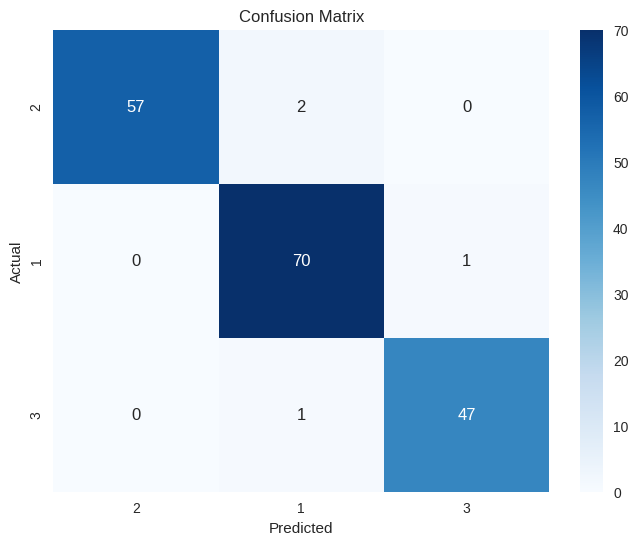

In [15]:


# TO DO: Print confusion matrix using a heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=wine_counts.index, yticklabels=wine_counts.index)


plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()


In [16]:
# TO DO: Print classification report

# Predict the target values based on the best model (SVC or Decision Tree).
y_pred = svc_model.predict(X) if best_model == "SVC" else dt_model.predict(X)

# Generate a classification report based on the true labels (y) and the predicted labels (y_pred).
report = classification_report(y, y_pred, target_names=wine_counts.index.astype(str).tolist())

# Print the classification report for the best model.
print("Classification Report for the best model:")
print(report)


Classification Report for the best model:
              precision    recall  f1-score   support

           2       1.00      0.97      0.98        59
           1       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*


1. SVMs encounter difficulties when dealing with intricate, non-linear datasets, especially when the data lacks clear separation or when the decision boundary isn't easily defined by a hyperplane. The performance of SVMs can also vary significantly depending on the choice of hyperparameters. Improperly tuned hyperparameters can result in suboptimal model performance.

2.

 The Decision Tree Classifier exhibits superior training and validation accuracy in comparison to the SVC. This implies that the Decision Tree model effectively captures intricate data patterns and generalizes well to new, unseen data.

3. To ascertain the count of misclassified samples, you can calculate the complementary value to the accuracy.
Number of misclassified samples = Total samples - Correctly classified samples
Number of misclassified samples = 178 - (178 * 0.98)
Number of misclassified samples = 3.56
As it's impossible to have a fraction of a sample being misclassified, this indicates that 3 samples were inaccurately classified.

4. In this dataset, we observe high precision and recall values for each class, indicating the model's strong performance. In this scenario, false positives have a lower impact, and therefore, the emphasis should be on maximizing recall.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I applied the concepts from lectures to formulate the basic structure of the code, and then enlisted the assistance of generative AIs to refine the exact syntax.
2. I tackled the questions in the sequence recommended within the provided questions.
3. I relied on AI to suggest column headers based on the data, although it wasn't entirely accurate. I needed to revisit the data and rectify the titles for three columns.
4. Determining whether to prioritize maximizing recall or precision in the preceding section posed a challenge, as discerning between a false negative and false positive was often ambiguous in this particular application.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*



Question 1: Although training model R2 exhibits promising results, such as an R2 of 0.996 for DT, it doesn't guarantee good validation and generalization for the data. Hence, it is crucial to possess a representative dataset and assess the model's performance across various datasets.

Question 2: F1-Score: The F1-score, which is the harmonic mean of precision and recall, achieves a balance between these two metrics. Across all classes (1, 2, and 3), the F1-scores are notably high, demonstrating a well-balanced trade-off between precision and recall.

Macro Avg: The macro average represents the unweighted average of precision, recall, and F1-score across all classes. In this instance, the macro average stands at 0.98, signifying the model's strong performance across all classes.

Precision & Recall: Precision quantifies the model's accuracy in making positive predictions, while recall (also known as sensitivity or true positive rate) assesses the model's ability to identify all relevant instances. In our dataset, both precision and recall exhibit exceptionally high values, indicating that the model is an excellent fit for this data.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


I appreciated the assignment's structured approach, which effectively guided me towards finding the answers. If the question had presented a single, broad task of identifying a suitable model, I believe it would have posed a challenge for me. However, by breaking down the problem into sequential steps, beginning with calculating MSE values, then R2 values, creating heat maps, and ultimately instructing us to compare the best models, it made the task more manageable.

I found the theoretical and deductive aspects following the coding to be engaging. Unlike many other courses where coding dominates, the inclusion of theory allows us to gain a deeper understanding of the purpose of the code and its relevance in real-world applications. This theoretical component enhances our ability to connect theory to practical implementation.
*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport

# Data Source
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
data = pd.read_csv(url, names=column_names)

# Splitting Data
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LinearSVC": LinearSVC(max_iter=5000)
}

# Model Evaluation
results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"], index=models.keys())

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    results.loc[model_name, "Training Accuracy"] = train_accuracy
    results.loc[model_name, "Validation Accuracy"] = val_accuracy

# Display Results
print(results)


                  Training Accuracy Validation Accuracy
Decision Tree                   1.0            0.944444
Random Forest                   1.0                 1.0
Gradient Boosting               1.0            0.944444
LinearSVC                  0.915493            0.972222


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*